# Analytics on Star War IV: New Hope

### 0. Load libaries and helpers

In [1]:
rm(list = ls())
suppressPackageStartupMessages({
library(Rcpp)
library(geometry) # calculate convex hull volume
library(MASS)
library(mnormt)   # generate mulvariate gaussian in porposal
library(igraph)   # graph alg and visualization
library(CVXR)     # optimization used in warm start in mcem
library(ggplot2)  
library(ggpubr)   # combine ggplot together
library(viridis)  # color palettes
})
# helpers
sourceCpp('../code/helper_mcem.cpp') # mcem algorithms
sourceCpp('../code/helper_comb.cpp') # combinatorial algorithms
source('../code/helper_general.R') # other helpers  
source('../code/helper_mcem_cpp_user.R') # MCEM algorithms' R wrapper using  mcem algorithms in cpp
source('../code/helper_starwar.R') # helpers for star war analytics

### 1. Import  data

- `new_hope_actor_lst.csv`: actors' name list.

- `new_hope_adjMat.csv`: binary-entry matrix is of shape n by m.
   - the $(i,j)$ entry of the adj mat is a 0-1 indicator whether node $i$ is in the $m$th hyperedge.
   - $n$ is num. of nodes
   - $m$ is num. of hyperedges

In [2]:
load.dataset.starwar()

[1] "###### Summary on dataset Star War IV ########"
[1] "Number of actors (nodes),  number of scenes (hyperedges) are respectively"
[1] 12 48
[1] "Main actors are sorted in decreasing order of nodal degree : "
       LUKE         HAN    THREEPIO        LEIA         BEN       VADER 
         38          26          20          19          16          11 
     TARKIN       BIGGS        OWEN  RED LEADER GOLD LEADER       WEDGE 
          7           4           3           3           2           2 
[1] "The busiest actor: LUKE, who shows up in 38 scenes!"
[1] "Histogram on k(num of actors per scene):"

 2  3  4  5  6 
11 24  9  3  1 


### 2. Preprocess data

Convert adjancy matrix to hyperedge set, which is input to mcem.

In [3]:
convert.adjmat.to.hyperedgeset(max.k.for.mcem=3)     

[1] "###### Proprocessing dateset for mcem ########"
[1] "set up max k = 6 in general hg for viz"
[1] "set up max k = 3 in general hg for mcem"
[1] "general hypergraph dataset for mcem: k-sets count:"
2-set 3-set 
   11    24 
Aug-26-15-20-01 | totol numbe of author is  12.00


### 3. Run mcem on star war hypergraph

In [4]:
set.seed(11)

res=run.mcem.general.hypergraph(which.mcem=2,isVerboseResult = FALSE, isSaveResult = FALSE)

print('hypergraph cardinalities:')
print(mix.k.demo)
print('beta est are:')
print(res$beta.hat)
print('feat.est is:')
print(res$feat.hat)



[1] "rbst-norm" "is chose."
Aug-26-15-20-01 | #### check mcem is to run on k = 2.00
 Aug-26-15-20-01 | #### check mcem is to run on k = 3.00
Aug-26-15-20-01 | MCEM on  k = 2 
[1] "MCEM: robust-norm"
Aug-26-15-20-02 |  *** robust MCEM on 2-unif hg is starting 
Aug-26-15-20-02 | Initial round: lkhd = -4.69564e+01, beta  = 0.000 
Aug-26-15-20-02 | 2th round: lkhd.estep = -4.69564e+01, beta = 0.182, lkhd.mstep = -4.34431e+01 
Aug-26-15-20-02 | 3th round: lkhd.estep = -4.92695e+01, beta = 0.134, lkhd.mstep = -4.52468e+01 
Aug-26-15-20-02 | 4th round: lkhd.estep = -4.92137e+01, beta = 0.117, lkhd.mstep = -4.56440e+01 
Aug-26-15-20-02 | 5th round: lkhd.estep = -5.24501e+01, beta = 0.000, lkhd.mstep = -4.69566e+01 
Aug-26-15-20-02 | 6th round: lkhd.estep = -4.69567e+01, beta = 0.001, lkhd.mstep = -4.69562e+01 
Aug-26-15-20-02 | 7th round: lkhd.estep = -4.69744e+01, beta = 0.000, lkhd.mstep = -4.69565e+01 
Aug-26-15-20-02 | 8th round: lkhd.estep = -4.69568e+01, beta = 0.000, lkhd.mstep = -4.695

# 4. Vizualization of hypergraph on posterior feature 

Visualization of general hypergraph on posterior latent feature, which is returned by mcem.

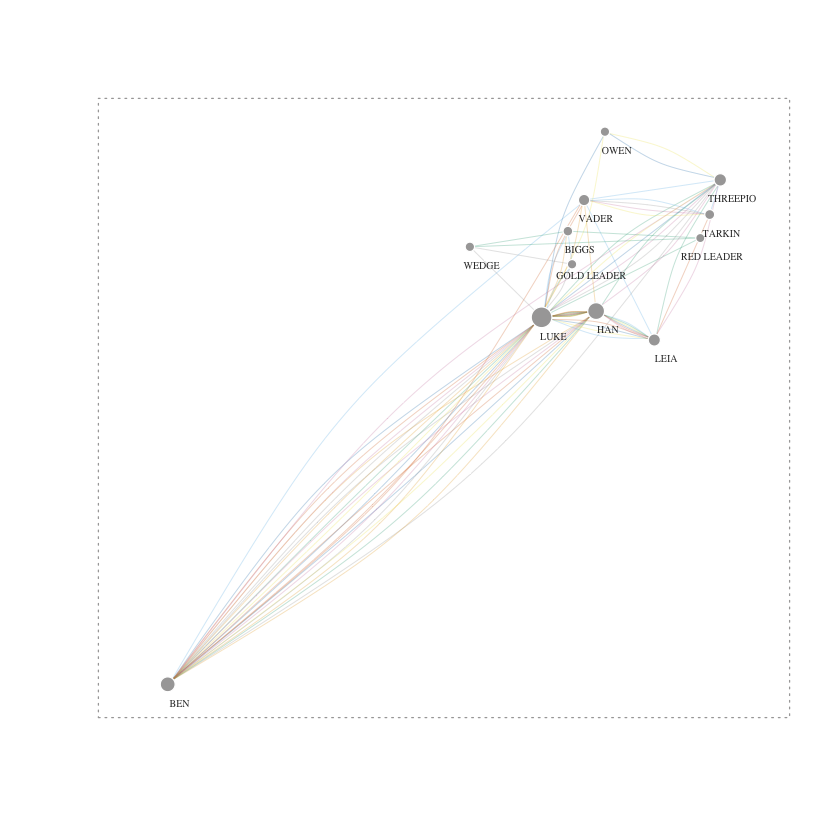

In [5]:
plot.starwar.hg.posterior.feat(isSavePlot=FALSE, isShowPlot=TRUE)

# 5. Predictive degree distribution

Nodal predictive HYPERGRAPH DEGREE DISTRIBUTION using hg generated from parameters returned by mcem

[1] "node VADER's plot is done."
[1] "node LUKE's plot is done."


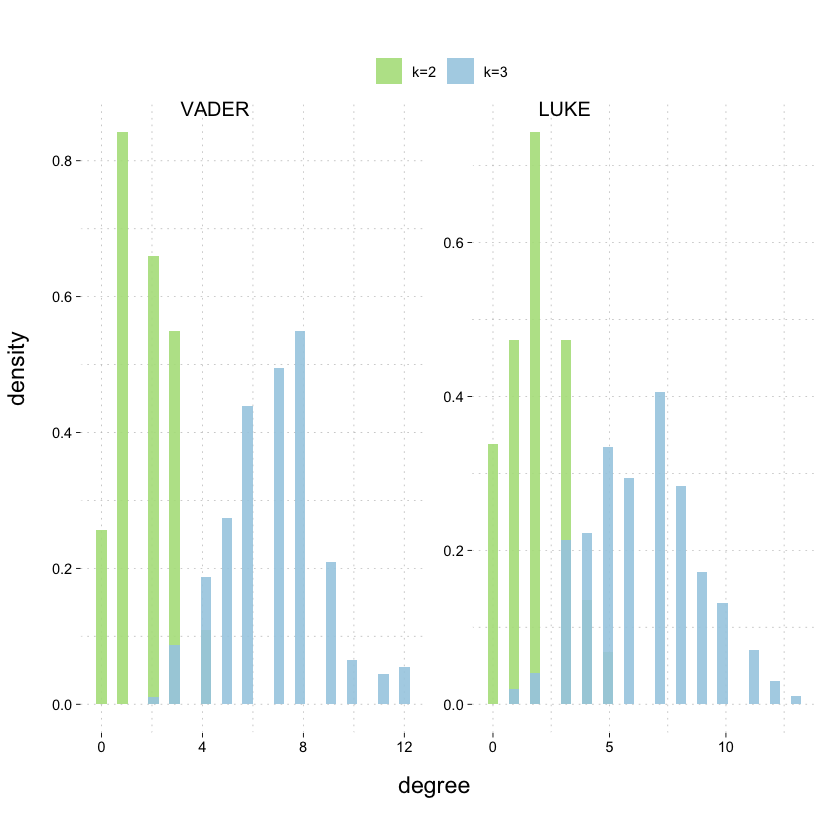

In [6]:
plot.starwar.predictive.degree(which.nodes.to.compare = c(1,3),isSavePlot=FALSE, isShowPlot=TRUE)